In [1]:
import numpy as np
#import mdtraj as mdt
#import pickle
import os
import datetime
import time

%matplotlib inline 
import matplotlib.pyplot as plt
##from mpl_toolkits import mplot3d
#from matplotlib import cm
##from matplotlib.patches import Rectangle

#import pandas as pd
#from scipy import stats
#from scipy.optimize import minimize

#import subprocess
#import re
#import copy

# plumed and gmx stuff
#import panedr as pdr
#import plumed
#import bussilab

./esp_general.awk test_one.pdb

In [2]:
bohr=0.529177249 # bohr to angstrom
lato_box=-10

In [3]:
((lato_box*bohr)-(-lato_box*bohr))/9/bohr # spacing

-2.2222222222222223

In [4]:
# atom charge
charge=1

In [9]:
# make the probe grid
X = np.linspace(-10*bohr,10*bohr,50) # min, max, npoints
Y = np.linspace(-10*bohr,10*bohr,50)
Z = np.linspace(-10*bohr,10*bohr,50)

xx, yy, zz = np.meshgrid(X,Y,Z)

print(xx.shape, yy.shape, zz.shape)

(50, 50, 50) (50, 50, 50) (50, 50, 50)


- Charge should be read somehow from a pdb input file (see the example pdb). 
- Box details (min, max, npoints) should be manually edited in the above window, or they can be asked for in the command line once all this is converted into a command line script.

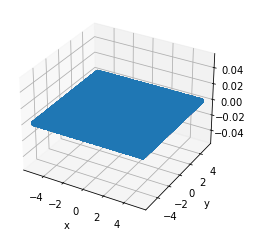

In [10]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(xx,yy)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

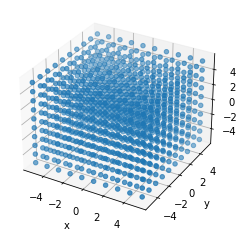

In [6]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(xx,yy,zz)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
x_atom=0
y_atom=0
z_atom=0

In [14]:
a=charge/np.sqrt((xx.flatten()-x_atom)**2+(yy.flatten()-y_atom)**2+(zz.flatten()-z_atom)**2)

In [15]:
a.shape

(125000,)

In [18]:
a=a.reshape(100,-1)

In [21]:
a=a.reshape(-1,50)

In [24]:
a.shape

(2500, 50)

In [23]:
a

array([[0.10910338, 0.11058722, 0.11206757, ..., 0.11206757, 0.11058722,
        0.10910338],
       [0.11058722, 0.11213329, 0.11367748, ..., 0.11367748, 0.11213329,
        0.11058722],
       [0.11206757, 0.11367748, 0.11528728, ..., 0.11528728, 0.11367748,
        0.11206757],
       ...,
       [0.11206757, 0.11367748, 0.11528728, ..., 0.11528728, 0.11367748,
        0.11206757],
       [0.11058722, 0.11213329, 0.11367748, ..., 0.11367748, 0.11213329,
        0.11058722],
       [0.10910338, 0.11058722, 0.11206757, ..., 0.11206757, 0.11058722,
        0.10910338]])

In [124]:
fmt='  %3.4e' *10
fmt

'  %3.4e  %3.4e  %3.4e  %3.4e  %3.4e  %3.4e  %3.4e  %3.4e  %3.4e  %3.4e'

In [69]:
fmt=np.array(['  %3.4e'] *50)
fmt

array(['  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e',
       '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e',
       '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e',
       '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e',
       '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e',
       '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e',
       '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e',
       '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e',
       '  %3.4e', '  %3.4e'], dtype='<U7')

In [70]:
fmt[6::6]='%3.4e\n'

In [73]:
print()

array(['  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e',
       '%3.4e\n', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e',
       '%3.4e\n', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e',
       '%3.4e\n', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e',
       '%3.4e\n', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e',
       '%3.4e\n', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e',
       '%3.4e\n', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e',
       '%3.4e\n', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e', '  %3.4e',
       '%3.4e\n', '  %3.4e'], dtype='<U7')

In [106]:
# header: needs to be improved to print stuff consistently with the input
header=""" Opt job potenital=scf
 Electrostatic potential from Total SCF Density
    1  -10.00000   -10.00000   -10.00000
   10    2.22222     0.00000     0.00000
   10    0.00000     2.22222     0.00000
   10    0.00000     0.00000     2.22222
    0    0.00000     0.00000     0.00000     0.00000"""

In [119]:
fmt='  %3.4e  %3.4e  %3.4e  %3.4e  %3.4e  %3.4e\n  %3.4e  %3.4e  %3.4e  %3.4e' # note the \n
# this is specidif to a grid with 10 points. Every 6 points there needs to be a \n.
# Best would be to automatize this.

In [120]:
# print formatted, with header
np.savetxt('prova.cube',a.reshape(100,-1),fmt=fmt,header=header,comments='')

Per visualizzare le field lines:
- gradient mag e min length piccoli
- max length altina (prova, tipo 50)